In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers,Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Input,BatchNormalization
import os
import cv2 as cv

In [2]:
path=r"C:\Users\vidya\Downloads\Brain Tumor Disease CNN\Training"

In [3]:
dis=os.listdir(path)
dis

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [4]:
dis.index("meningioma_tumor")

1

In [5]:
Data=[]
for i in dis:
    A=os.path.join(path,i) 
    for j in os.listdir(A):
        B=os.path.join(A,j)
        img=cv.imread(B)
        C=cv.resize(img,(50,50))
        T=dis.index(i) 
        Data.append([C,T]) 

In [6]:
i=cv.imread(r"C:\Users\vidya\Downloads\Brain Tumor Disease CNN\Training\meningioma_tumor\m1(44).jpg")

In [7]:
i.shape

(512, 512, 3)

In [8]:
Data[400]

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [3, 3, 3],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[4, 4, 4],
         [5, 5, 5],
         [5, 5, 5],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [3, 3, 3]],
 
        [[4, 4, 4],
         [5, 5, 5],
         [4, 4, 4],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        ...,
 
        [[5, 5, 5],
         [5, 5, 5],
         [5, 5, 5],
         ...,
         [6, 6, 6],
         [4, 4, 4],
         [5, 5, 5]],
 
        [[5, 5, 5],
         [4, 4, 4],
         [4, 4, 4],
         ...,
         [5, 5, 5],
         [3, 3, 3],
         [3, 3, 3]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [3, 3, 3],
         [3, 3, 3],
         [1, 1, 1]]], dtype=uint8),
 0]

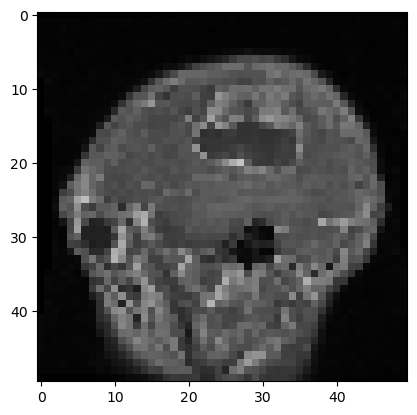

In [9]:
plt.imshow(Data[10][0])

In [10]:
len(Data)

2870

In [11]:
len(Data[1][0])

50

In [12]:
Data[100][1]

0

In [13]:
import random
random.shuffle(Data)

In [14]:
F=[]
T=[]
for i,j in Data:
    F.append(i)
    T.append(j)

In [15]:
len(F)

2870

In [16]:
T

[1,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 2,
 1,
 1,
 3,
 1,
 2,
 3,
 3,
 1,
 0,
 2,
 3,
 0,
 0,
 3,
 2,
 1,
 1,
 3,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 2,
 1,
 0,
 3,
 1,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 2,
 0,
 3,
 0,
 3,
 2,
 0,
 0,
 2,
 2,
 3,
 3,
 0,
 0,
 1,
 0,
 1,
 3,
 1,
 0,
 1,
 0,
 0,
 0,
 3,
 2,
 0,
 3,
 3,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 3,
 3,
 1,
 3,
 0,
 0,
 3,
 0,
 1,
 2,
 2,
 1,
 0,
 3,
 0,
 0,
 3,
 3,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 3,
 1,
 1,
 0,
 3,
 1,
 1,
 3,
 1,
 3,
 0,
 0,
 1,
 3,
 3,
 0,
 2,
 3,
 1,
 0,
 0,
 2,
 3,
 3,
 0,
 2,
 3,
 1,
 1,
 1,
 3,
 0,
 0,
 1,
 0,
 3,
 3,
 3,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 3,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 3,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 1,
 1,
 3,
 0,
 2,
 3,
 0,
 0,
 3,
 3,
 3,
 0,
 0,
 2,
 0,
 3,
 1,
 1,
 0,
 1,
 3,
 3,
 2,
 3,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 3,
 3,
 3,
 0,
 1,
 3,
 1,


In [17]:
T1=pd.get_dummies(T).replace({True:1,False:0})
T1

C:\Users\vidya\AppData\Local\Temp\ipykernel_3976\3722759232.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T1=pd.get_dummies(T).replace({True:1,False:0})


,0,1,2,3
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
2865,1,0,0,0
2866,0,1,0,0
2867,0,0,0,1
2868,0,0,1,0


In [18]:
F=np.array(F)

In [19]:
T=np.array(T)

In [20]:
T

array([1, 3, 3, ..., 3, 2, 3])

In [21]:
F1=F/255.

In [22]:
F

array([[[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1]],

        [[ 2,  2,  2],
         [ 2,  2,  2],
         [ 3,  3,  3],
         ...,
         [ 2,  2,  2],
         [ 3,  3,  3],
         [ 2,  2,  2]],

        [[ 4,  4,  4],
         [ 3,  3,  3],
         [ 3,  3,  3],
         ...,
         [ 2,  2,  2],
         [ 3,  3,  3],
         [ 3,  3,  3]],

        ...,

        [[ 3,  3,  3],
         [ 4,  4,  4],
         [ 3,  3,  3],
         ...,
         [ 2,  2,  2],
         [ 3,  3,  3],
         [ 4,  4,  4]],

        [[ 3,  3,  3],
         [ 3,  3,  3],
         [ 3,  3,  3],
         ...,
         [ 3,  3,  3],
         [ 2,  2,  2],
         [ 2,  2,  2]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 3,  3,  3],
         [ 1,  1,  1],
         [ 1,  1,  1]]],


       [[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0, 

In [23]:
F1.shape

(2870, 50, 50, 3)

In [24]:
T1.shape

(2870, 4)

In [25]:
T1=np.array(T)

In [26]:
from keras.layers import Dense,Lambda,Input, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential

In [27]:
vgg=VGG16(input_shape=[50,50,3],
         weights='imagenet',
         include_top=False)

In [28]:
for i in vgg.layers:
    i.trainable=False

In [29]:
x=Flatten()(vgg.output)

In [30]:
z=Dense(1,activation='sigmoid')(x)

In [31]:
model=Model(vgg.input,z)

In [32]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [33]:
model.fit(F1,T1, epochs=4, validation_split=0.3)

Epoch 1/4
63/63 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.2749 - loss: -0.6503 - val_accuracy: 0.2796 - val_loss: -2.8357
Epoch 2/4
63/63 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.2845 - loss: -2.9729 - val_accuracy: 0.2796 - val_loss: -5.1918
Epoch 3/4
63/63 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.2799 - loss: -5.5247 - val_accuracy: 0.2796 - val_loss: -7.5698
Epoch 4/4
63/63 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.3042 - loss: -7.1334 - val_accuracy: 0.2796 - val_loss: -9.9850


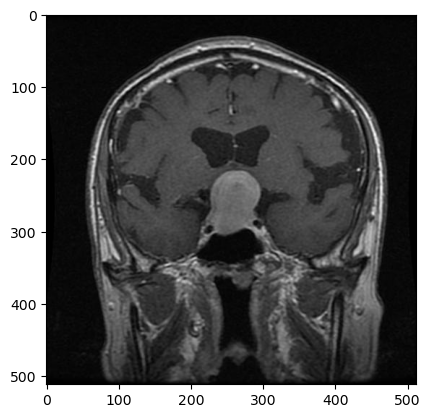

In [36]:
img_path = r"C:\Users\vidya\Downloads\Brain Tumor Disease CNN\Training\pituitary_tumor\p (36).jpg"
img = cv.imread(img_path,)

img_resized = cv.resize(img, (50, 50))
img_resized=img_resized.reshape(1, 50, 50, 3)

plt.imshow(img,)
plt.show()

In [38]:
prediction = model.predict(img_resized)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step


array([[1.]], dtype=float32)

In [39]:
dis[2]

'no_tumor'

In [40]:
p1=r"C:\Users\vidya\Downloads\Brain Tumor Disease CNN\Testing"


In [41]:
Data1=[]
for i in dis:
    A=os.path.join(p1,i) 
    for j in os.listdir(A):
        B=os.path.join(A,j)
        img=cv.imread(B)
        C=cv.resize(img,(50,50))
        T=dis.index(i) 
        Data1.append([C,T]) 

In [42]:
import random
random.shuffle(Data1)

In [43]:
Data1[1]

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 2]

In [44]:
F1=[]
T1=[]
for i,j in Data1:
    F1.append(i)
    T1.append(j)

In [45]:
T1

[2,
 2,
 0,
 0,
 3,
 1,
 1,
 3,
 1,
 2,
 3,
 0,
 2,
 3,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 3,
 3,
 0,
 2,
 2,
 2,
 2,
 3,
 1,
 3,
 2,
 3,
 2,
 1,
 2,
 0,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 3,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 3,
 1,
 2,
 0,
 2,
 0,
 1,
 3,
 3,
 2,
 3,
 0,
 1,
 3,
 0,
 0,
 3,
 1,
 3,
 3,
 3,
 1,
 2,
 1,
 3,
 2,
 1,
 0,
 0,
 2,
 3,
 2,
 3,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 3,
 0,
 3,
 3,
 0,
 3,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 3,
 2,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 3,
 3,
 3,
 2,
 2,
 0,
 1,
 0,
 3,
 2,
 2,
 1,
 2,
 3,
 2,
 1,
 0,
 2,
 2,
 3,
 0,
 0,
 2,
 2,
 1,
 0,
 1,
 3,
 2,
 1,
 3,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 3,
 1,
 0,
 3,
 3,
 1,
 1,
 1,
 3,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 3,
 0,
 0,
 3,
 0,
 3,
 3,
 0,
 3,
 0,
 1,
 3,
 2,
 1,
 0,
 1,
 1,
 2,
 0,


In [46]:
F1=np.array(F1)
F1=F1/255  

In [47]:
pred=model.predict(F1)
pred

13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step


array([[1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999994],
       [1.        ],
       [0.99999994],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.9999998 ],
       [1.        ],
       [1.        ],
       [0.99999994],
       [1.        ],
       [0.9999999 ],
       [1.        ],
       [1.        ],
       [0.99999976],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999994],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999994],
       [1.        ],
       [0.999

In [48]:
pred1=[]
for i in pred:
    pred1.append(np.argmax(i))

In [49]:
pred1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [51]:
confusion_matrix(T1,pred1)

array([[100,   0,   0,   0],
       [115,   0,   0,   0],
       [105,   0,   0,   0],
       [ 74,   0,   0,   0]], dtype=int64)

In [52]:
print(classification_report(T1,pred1))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40       100
           1       0.00      0.00      0.00       115
           2       0.00      0.00      0.00       105
           3       0.00      0.00      0.00        74

    accuracy                           0.25       394
   macro avg       0.06      0.25      0.10       394
weighted avg       0.06      0.25      0.10       394



C:\Users\vidya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vidya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vidya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:
accuracy_score(T1,pred1)*100

25.380710659898476